In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

In [2]:
main_df = pd.read_csv("data/diamonds.csv")
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         388 non-null     object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159096 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [3]:
main_df

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,NaN,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,NaN,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,NaN,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,NaN,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,NaN,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [4]:
df = main_df.copy()

### Shape
Type of diamond shape, mostly be `round` shape

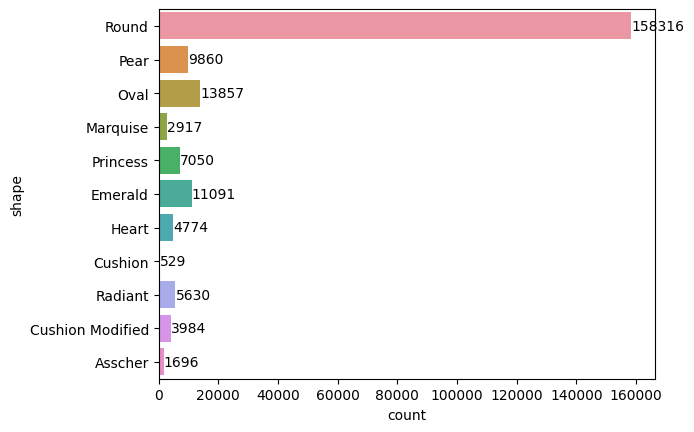

In [5]:
ax = sns.countplot(data=df, y="shape")
ax.bar_label(ax.containers[0])
plt.show()

### Size
size of diamond in carat unit 

<Axes: xlabel='size', ylabel='total_sales_price'>

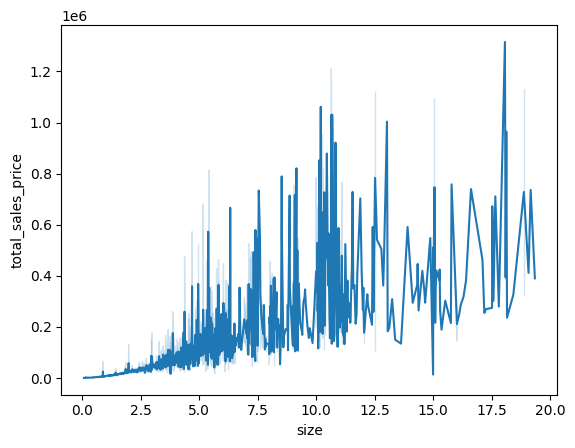

In [6]:
sns.lineplot(data=df, x="size", y="total_sales_price")

From the graph we can see that when size increase total_sales_price tend to increse too.

<Axes: xlabel='size', ylabel='Density'>

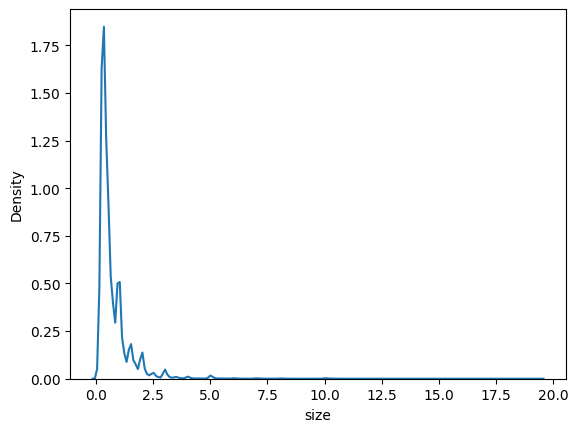

In [7]:
sns.kdeplot(data=df, x="size")

From the graph, we can see that most of diamond size is between `0 - 2.5`.

### color
diamond color, from  D (colorless is best quality) to M (Faint Yellow)  
This graph show number of diamond in group of color.  

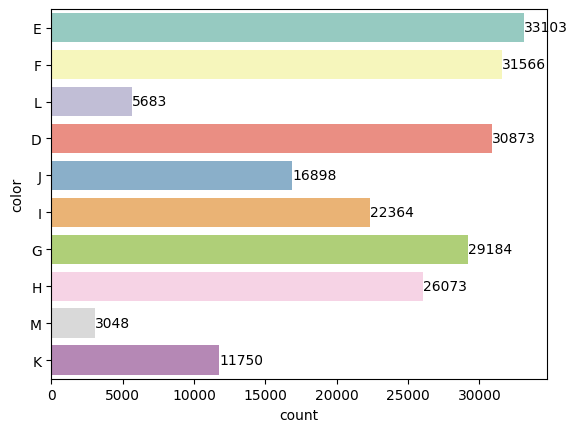

In [8]:
ax = sns.countplot(data=df, y="color", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()


![Diamond color chart](https://beyond4cs.com/wp-content/uploads/2019/02/diamond-color-chart-with-example-diamonds-of-each-alphabet.jpg)

### fancy_color_dominant_color
dominant (primary) color of diamond  
most of dominant color of diamond is `yellow`.

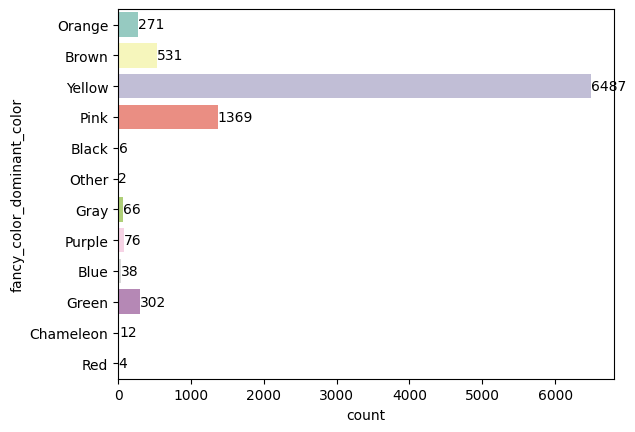

In [9]:
ax = sns.countplot(data=df, y="fancy_color_dominant_color", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()


### fancy_color_secondary_color
secondary color of diamond  
we can see that the secondary color of diamond mostly `brown`.

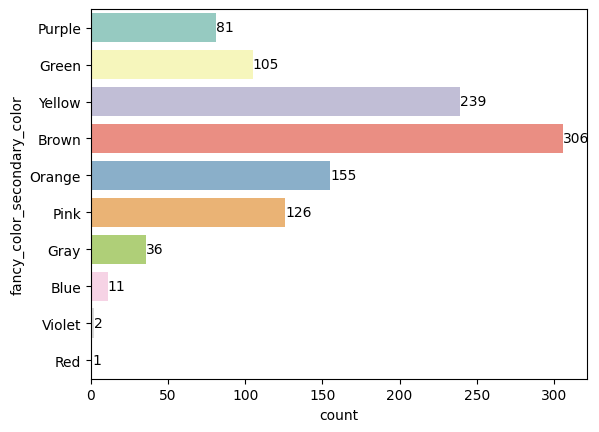

In [10]:
ax = sns.countplot(data=df, y="fancy_color_secondary_color", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()


### fancy_color_overtone
overtone color of diamond  
we can see that overtone color of diamond is rarely see in this data set. The most overtone color that have found in this dataset is `brownish`.

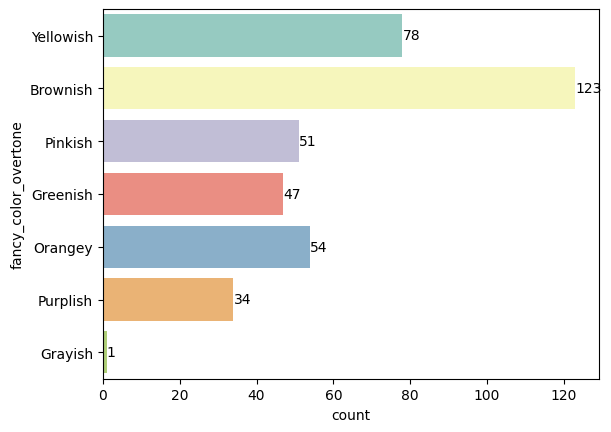

In [11]:
ax = sns.countplot(data=df, y="fancy_color_overtone", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()


### fancy_color_intensity
intensity of diamond is the strength of color 

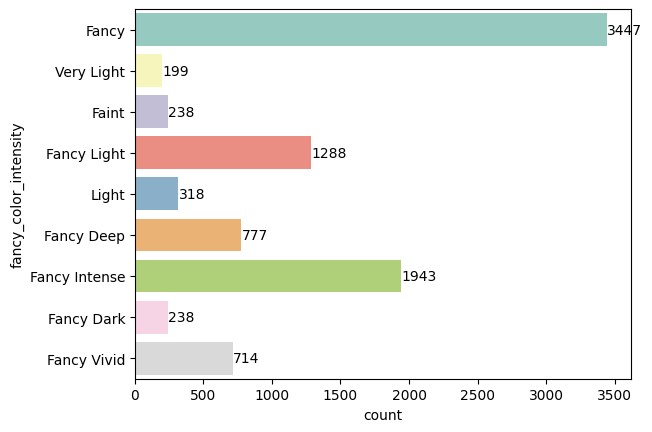

In [12]:
ax = sns.countplot(data=df, y="fancy_color_intensity", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()

![diamond color intensity](https://cdn.speedsize.com/a7c7f99e-05c9-408f-98ec-e21a31b4d7b1/https://www.leibish.com/media/mediabank/fancy-color-diamond-intensity_1642.e205e.jpg)

### clarity
clarity of diamond (scratches on a diamond)

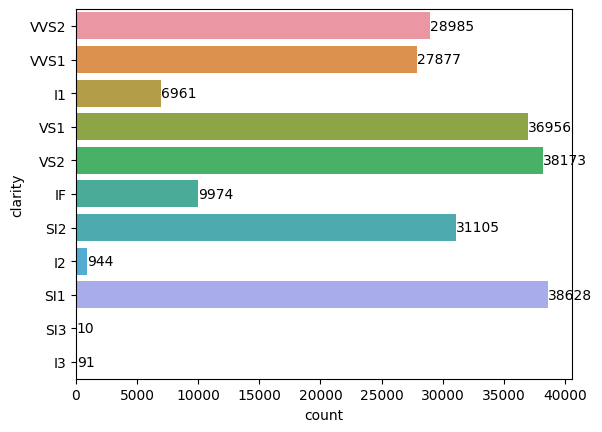

In [13]:
ax = sns.countplot(data=df, y="clarity")
ax.bar_label(ax.containers[0])
plt.show()

![diamond clarity](https://www.datocms-assets.com/25216/1652905572-d-clarity-chart.jpg?q=25&auto=format&w=1440)

### cut
cutting grade of diamond from Excellent to Poor  
Mostly in `Excellent` grade

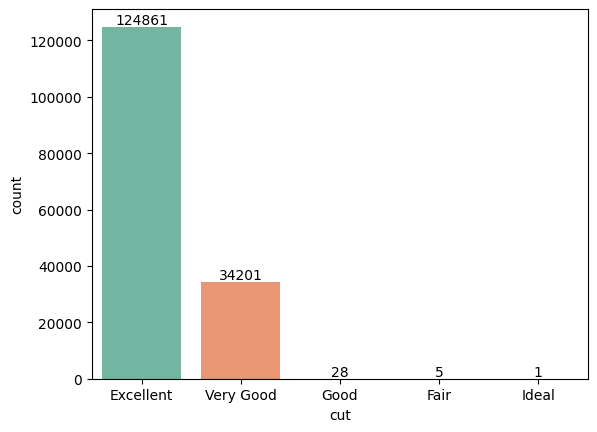

In [14]:
ax = sns.countplot(data=df, x="cut", palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

### symmetry
refer to the exactness and the condition of the diamond's surface  
mostly in `Excellent` grade

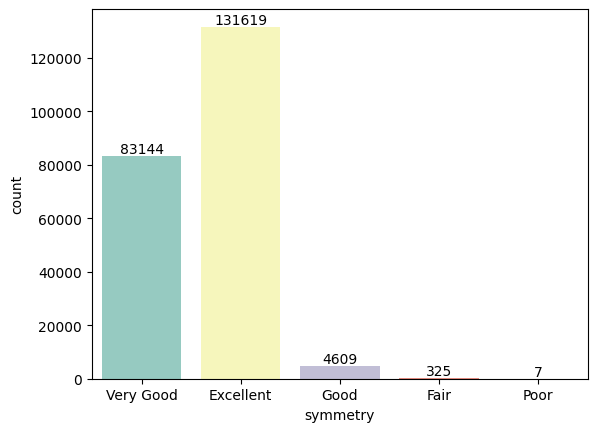

In [15]:
ax = sns.countplot(data=df, x="symmetry", palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()

![diamond symmetry chart](https://kanjimull.com/wp-content/uploads/2021/05/diamondsymmetrycomparisonsacrossdifferentgrades.jpg)

### polish
degree of smoothness of each facet (side) of a diamond  
mostly in `Excellent` grade

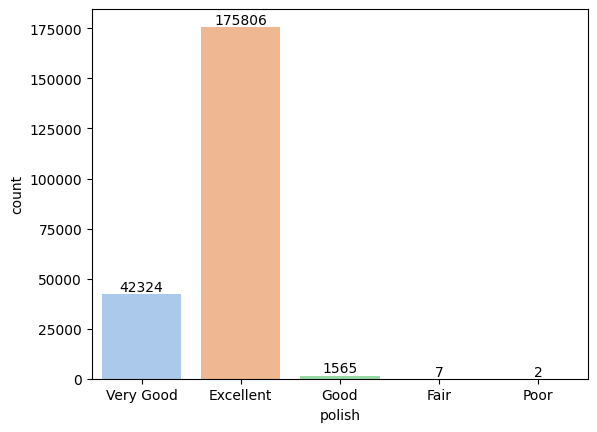

In [16]:
ax = sns.countplot(data=df, x="polish", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

### depth_percent
ratio between the depth that measure from the table to the culet and total diameter of the diamond  
mostly between `40-80%`

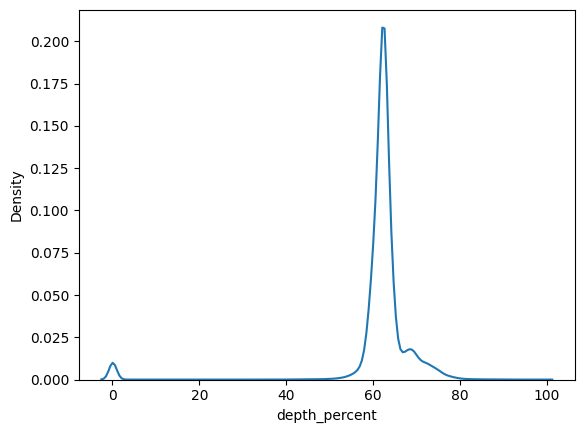

In [17]:
ax = sns.kdeplot(data=df, x="depth_percent")
plt.show()

### table_percent
ratio between the table width and the total width of the diamond (meas_width)  
mostly between `40-80%`

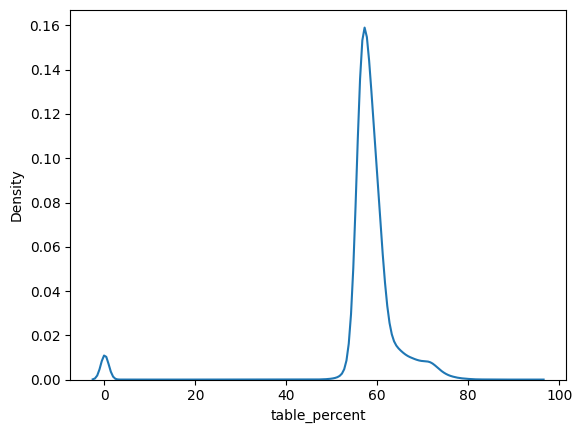

In [18]:
ax = sns.kdeplot(data=df, x="table_percent")
plt.show()

### meas_length
check how length of a diamond is (in mm)  
mostly between `0-20 mm.`

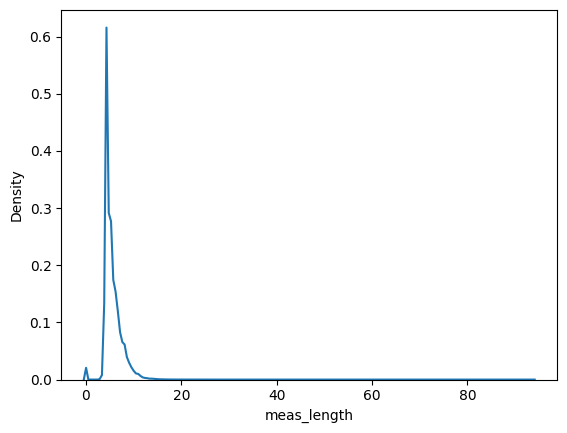

In [19]:
ax = sns.kdeplot(data=df, x="meas_length")
plt.show()

### meas_width
check how width of a diamond is (in mm)  
between `0-10 mm.`

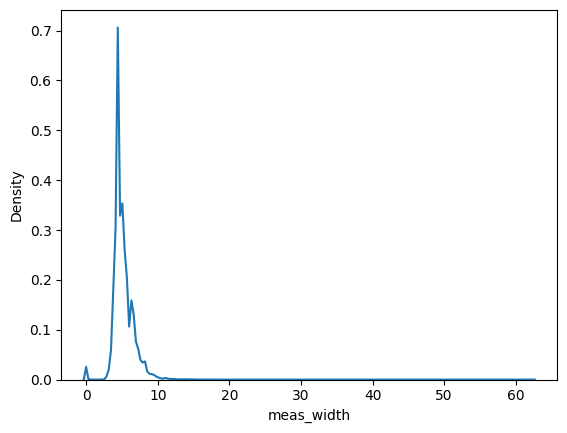

In [20]:
ax = sns.kdeplot(data=df, x="meas_width")
plt.show()

### meas_depth
check how depth of a diamond is (in mm)  
between `0-10 mm.`

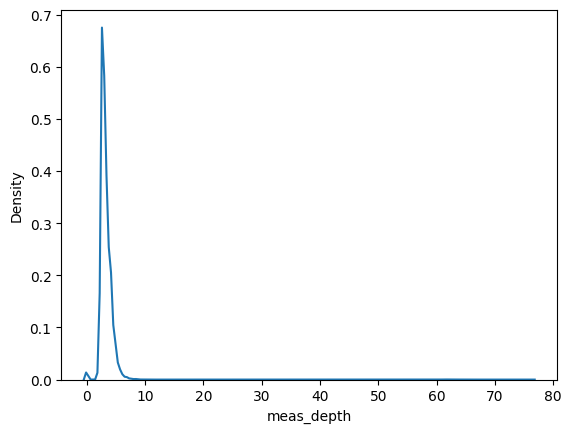

In [21]:
ax = sns.kdeplot(data=df, x="meas_depth")
plt.show()

### girdel
![diamond girdel chart](https://diamondbuzz.blog/wp-content/uploads/2020/07/Girdle-Thickness-Scale.jpg)

### girdle_min
the grade of the thinest part (hill) of outer edge of the diamond where crown (top) meet the pavilion (bottom)  
mostly in `Medium (M)` size

**Size in girdle**  
XTN : Extremely Thin,
TN : Thin,
M : Medium,
STK : Slightly Thick,
TK : Thick,
VTK : Very Thick,
XTK : Extremely Thick

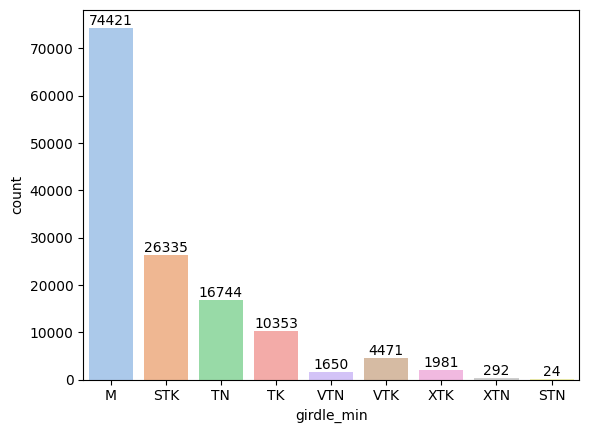

In [22]:
ax = sns.countplot(data=df, x="girdle_min", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

### girdle_max
the grade of the thickest part (hill) of outer edge of the diamond where crown (top) meet the pavilion (bottom)  
mostly in `Slightly Thick (STK)` size

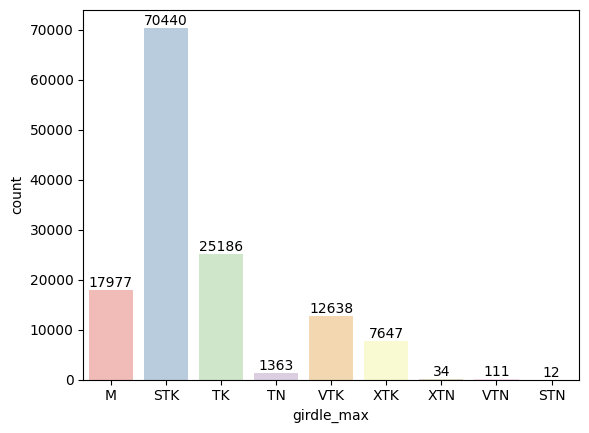

In [23]:
ax = sns.countplot(data=df, x="girdle_max", palette='Pastel1')
ax.bar_label(ax.containers[0])
plt.show()

### culet_size
the width of the culet facet, when present, relative to a round diamond's average girdle diameter.  
most of diamond culet size is `N`.

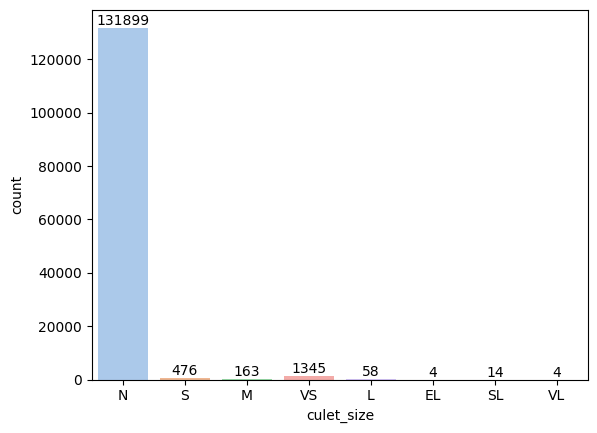

In [24]:
ax = sns.countplot(data=df, x="culet_size", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

![culet size chart](https://www.jewelry-secrets.com/Blog/wp-content/uploads/2015/05/Diamond-Culet-Sizes.jpg)

### culet_condition
culet status  
from the graph, we can see that most culet condition of diamond is `Pointed`

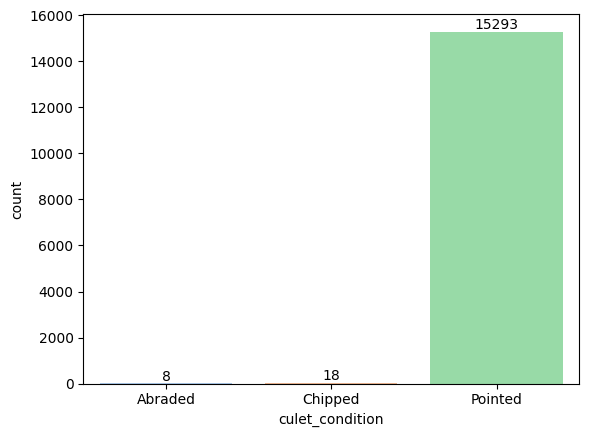

In [25]:
ax = sns.countplot(data=df, x="culet_condition", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

![culet condition: chip](https://www.jewelry-secrets.com/Blog/wp-content/uploads/2015/05/Chipped-Diamond-Culet.jpg)
![culet condition: Abraded](https://www.jewelry-secrets.com/Blog/wp-content/uploads/2015/05/Diamond-Culet-Abrasion.jpg)

### fluor_color
the colored glow that is visible when a diamond is exposed to UV light  
mostly `Blue`

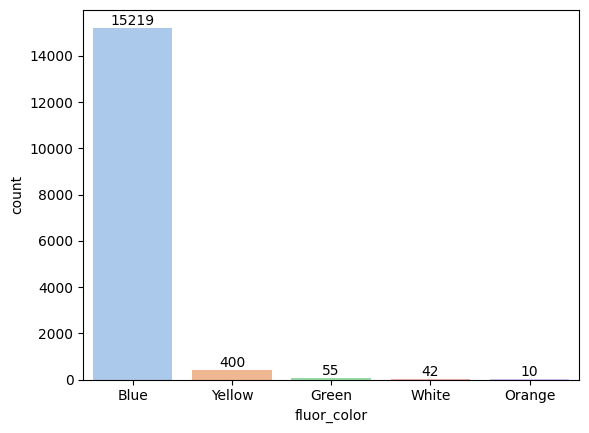

In [26]:
ax = sns.countplot(data=df, x="fluor_color", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

### fluor_intensity
the intensity of color when a diamond is exposed to UV light  
mostly `Faint`

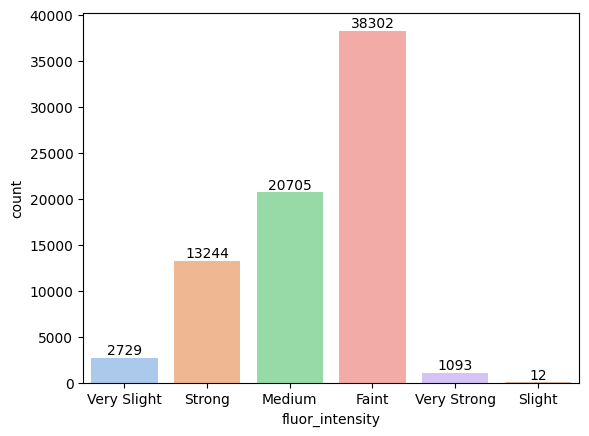

In [27]:
ax = sns.countplot(data=df, x="fluor_intensity", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

### Lab
Diamond Certificates   
We can see that most of diamond certificates is `GIA`

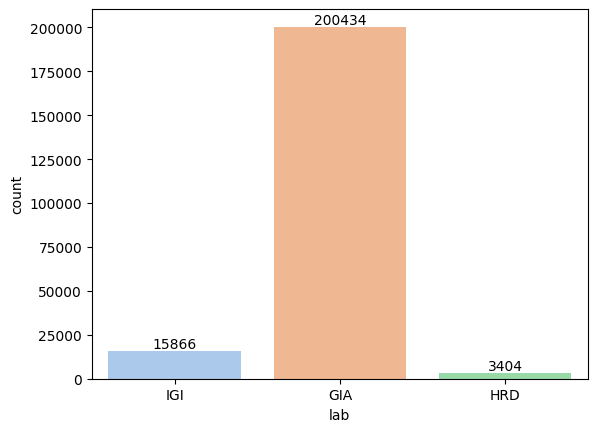

In [28]:
ax = sns.countplot(data=df, x="lab", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

### total_sales_price
price of a diamond (USD)  
We can see the outlier from the graph

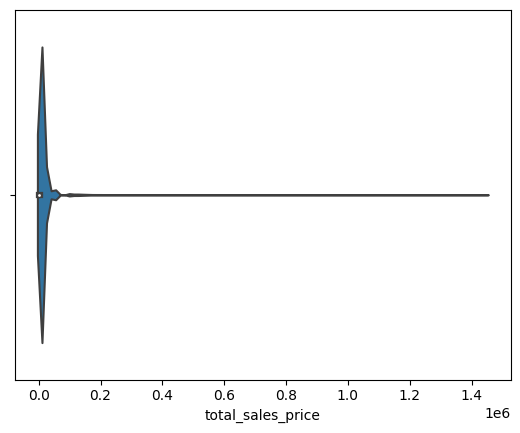

In [29]:
ax = sns.violinplot(data=df, x="total_sales_price")
plt.show()

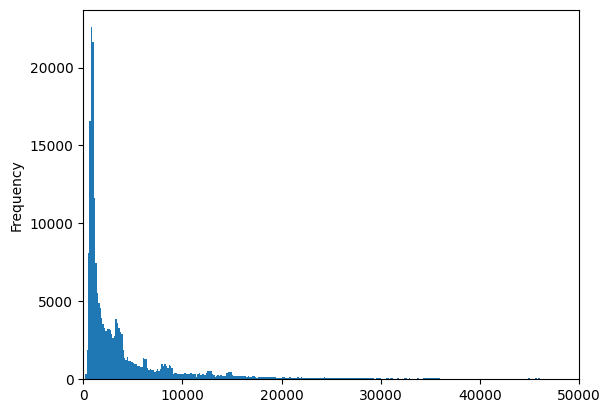

In [30]:
ax = main_df['total_sales_price'].plot.hist(bins=10000)
ax.set_xlim(0, 50000)
plt.show()

### eye_clean
grading the diamonds for its visibility of inclusion with naked eye  
Mostly `Yes`

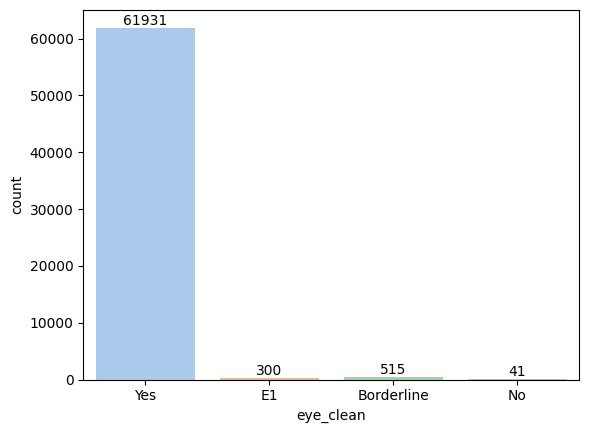

In [31]:
ax = sns.countplot(data=df, x="eye_clean", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

### Date

In [32]:
df['date'].unique()

array(['2022-02-24'], dtype=object)

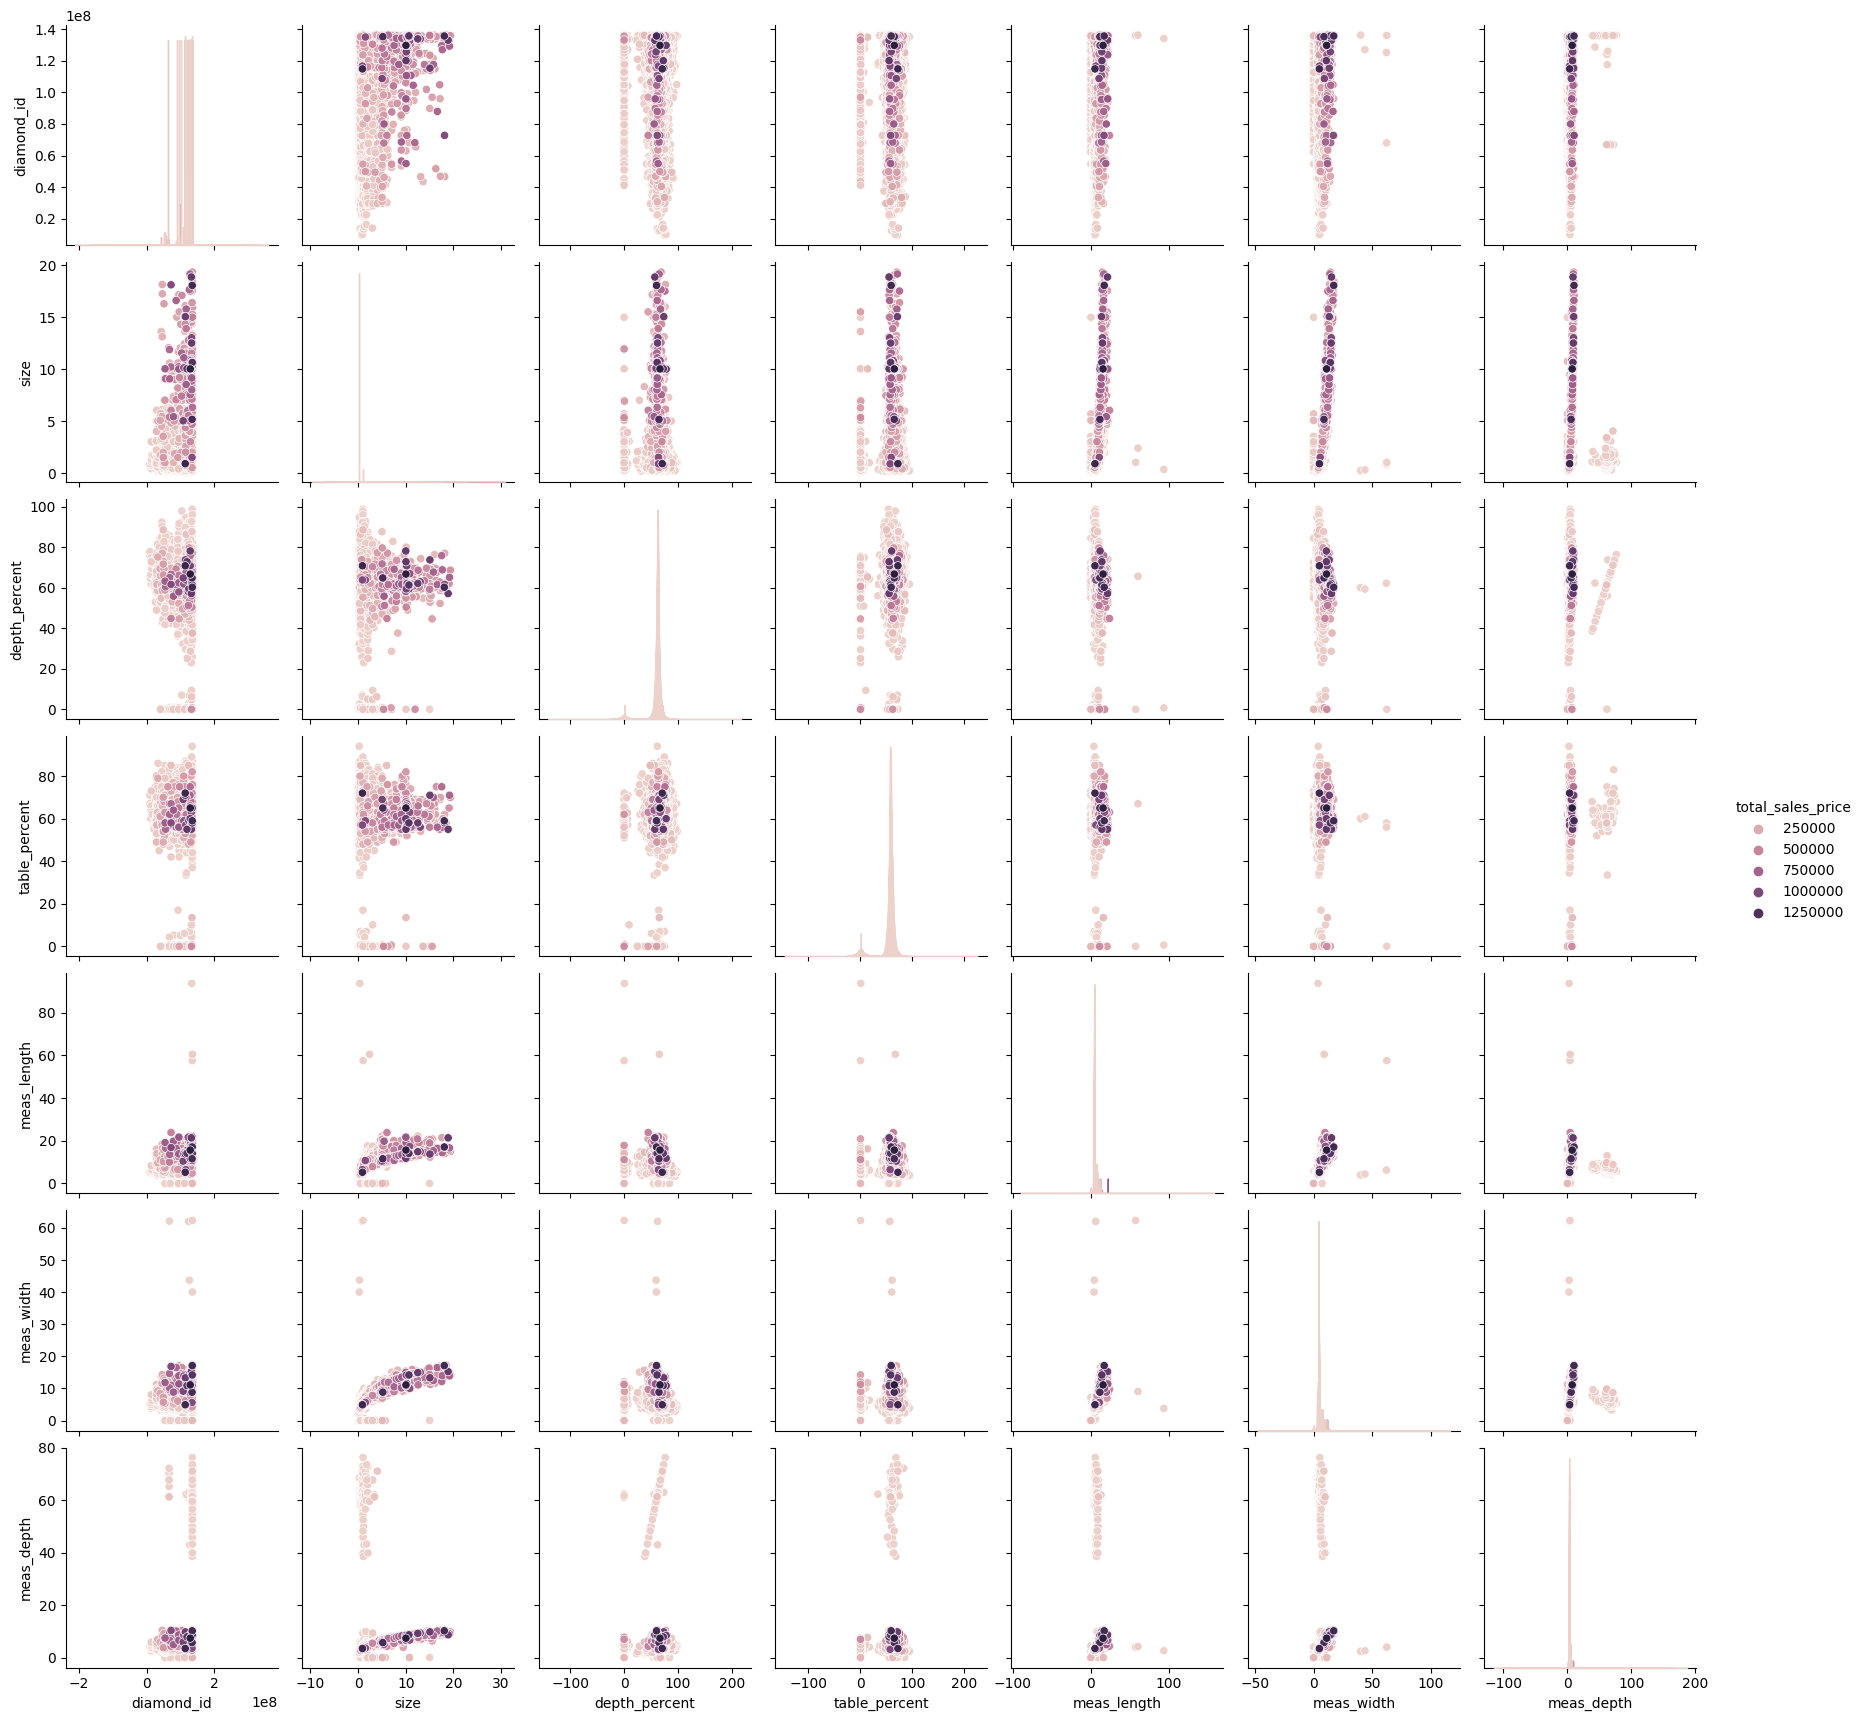

In [33]:
sns.pairplot(df, hue="total_sales_price")

![pairplot main dataframe](public/pairplot_maindf.png)